In [82]:
from faker import Faker
import pandas as pd
import random

fake = Faker()

data = []

categories = ["Electronics", "Clothing", "Books", "Home", "Beauty"]

for i in range(500):
    data.append({
        "order_id" : fake.uuid4(),
        "order_date" : fake.date_between(start_date="-6M", end_date= "today"),
        "customer_id" : fake.random_int(min= 1000, max=9999),
        "product_category" : random.choice(categories),
        "price": round(random.uniform(100, 5000), 2),
        "quantity" : random.randint(1, 5),
        "discount_percent" : random.choice([0, 5, 10, 15, 20])
    })

df = pd.DataFrame(data)
print(df)


                                 order_id  order_date  customer_id  \
0    b36d4d80-6b4f-491f-84ba-42ac7d46c2e4  2025-09-30         8917   
1    f3d8fc3b-74ba-44a0-8aa1-77d821bb70ca  2025-10-17         6974   
2    df021028-74f0-403a-ad7a-af3d5b9b0325  2025-10-18         5902   
3    f17ab691-4acc-48d4-aa2d-4b3f4b0c0a2d  2026-01-17         7555   
4    8707d21e-17b4-4d13-8699-981f2ed6514f  2025-12-10         9402   
..                                    ...         ...          ...   
495  85c92fe8-e70f-428e-b748-4e1dd6b5be7c  2025-11-04         5991   
496  dbeec901-9838-4726-b73a-5fcb1ef62a9b  2025-12-03         9034   
497  1a9e101d-4f3a-44fe-a203-0012f917461d  2025-08-05         8620   
498  055610fe-8226-40da-9641-0e810463ea43  2025-11-13         2380   
499  a3cac5f8-aa8c-4278-b3fc-3c936837f9f8  2025-10-13         8050   

    product_category    price  quantity  discount_percent  
0               Home  3711.35         3                 5  
1             Beauty   536.85         2

compute the final order amount after discount

In [83]:
df["total_price"] = df["price"] * df["quantity"]

df["discount_amount"] = df["total_price"] * (df["discount_percent"] / 100)

df["final_amount"] = df["total_price"] - df["discount_amount"]

print(df["final_amount"].head(5))

0    10577.3475
1      966.3300
2    15192.1800
3     2813.6020
4     8857.9620
Name: final_amount, dtype: float64


identify top 3 categories by total revenue

In [84]:
top_categories = df.groupby("product_category")["final_amount"].sum().head(3)
top_categories

product_category
Beauty      657347.9755
Books       660148.8620
Clothing    683521.0235
Name: final_amount, dtype: float64

calculate monthly revenue per product category

In [85]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["month"] = df["order_date"].dt.to_period("M")
monthly_revenue = df.groupby(["month", "product_category"])["final_amount"].sum()
print(monthly_revenue)

month    product_category
2025-07  Books                41999.4080
         Clothing             59198.5020
         Electronics          22407.4990
         Home                 39554.3800
2025-08  Beauty              161968.3950
         Books               133063.7435
         Clothing             74041.6245
         Electronics          54044.7455
         Home                134068.1215
2025-09  Beauty               74631.4255
         Books                83835.2185
         Clothing            150447.4205
         Electronics         112005.9430
         Home                 83097.3620
2025-10  Beauty              112033.7930
         Books               104113.7825
         Clothing            117139.1365
         Electronics         128020.5125
         Home                140028.7510
2025-11  Beauty               84062.9315
         Books                93151.3160
         Clothing            103927.5685
         Electronics         168216.5690
         Home                10

#using numpy
detect unsually high or low order values

In [86]:
import numpy as np

print(df["final_amount"])
values = df["final_amount"]

mean = np.mean(values)
print(mean)

std = np.std(values)
print(std)

less_deviation = mean  - std
more_deviation = mean -  std

anomalies = df[(values < less_deviation) | (values > more_deviation)]
print("Anmolies: ")
print(anomalies)



0      10577.3475
1        966.3300
2      15192.1800
3       2813.6020
4       8857.9620
          ...    
495    20414.4550
496     2788.5900
497    22240.3000
498      186.4800
499     6352.5120
Name: final_amount, Length: 500, dtype: float64
6764.171215
5253.43314861372
Anmolies: 
                                 order_id order_date  customer_id  \
0    b36d4d80-6b4f-491f-84ba-42ac7d46c2e4 2025-09-30         8917   
1    f3d8fc3b-74ba-44a0-8aa1-77d821bb70ca 2025-10-17         6974   
2    df021028-74f0-403a-ad7a-af3d5b9b0325 2025-10-18         5902   
3    f17ab691-4acc-48d4-aa2d-4b3f4b0c0a2d 2026-01-17         7555   
4    8707d21e-17b4-4d13-8699-981f2ed6514f 2025-12-10         9402   
..                                    ...        ...          ...   
495  85c92fe8-e70f-428e-b748-4e1dd6b5be7c 2025-11-04         5991   
496  dbeec901-9838-4726-b73a-5fcb1ef62a9b 2025-12-03         9034   
497  1a9e101d-4f3a-44fe-a203-0012f917461d 2025-08-05         8620   
498  055610fe-8226-40da-

In [75]:
median_value = np.median(values)

df.loc[(values < less_deviation)| (values > more_deviation), "final_amount"] = median_value
print("anomalies replaced with median values")

anomalies replaced with median values


plot montly revenue trends

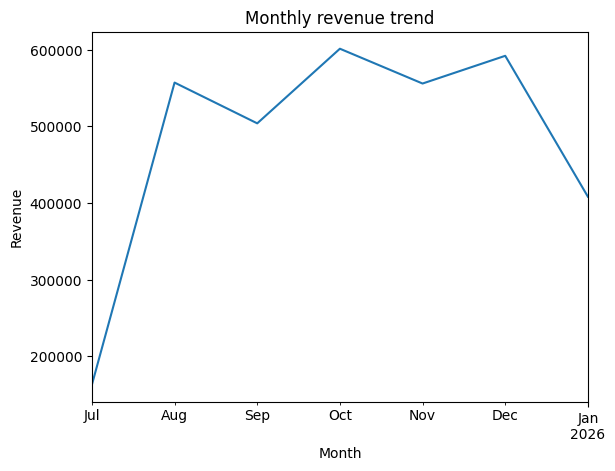

In [88]:
import matplotlib.pyplot as plt

monthly_total = df.groupby("month")["final_amount"].sum()
monthly_total.plot(kind = "line")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly revenue trend")
plt.show()

compare revenue distribution across categories

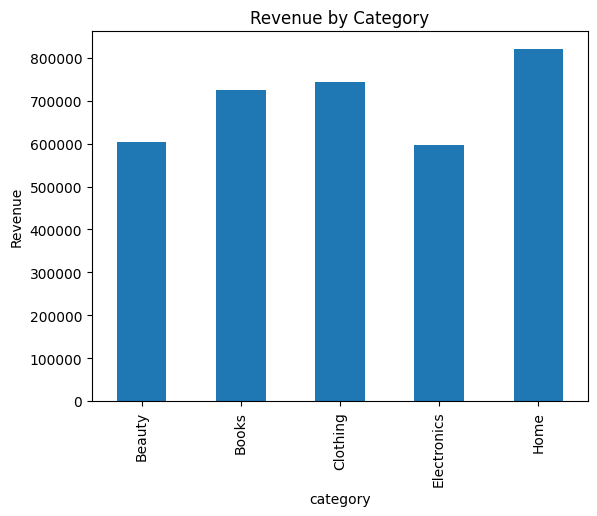

In [71]:
category_revenue = df.groupby("product_category")["final_amount"].sum()
category_revenue.plot(kind="bar")
plt.title("Revenue by Category")
plt.xlabel("category")
plt.ylabel("Revenue")
plt.show()